In [120]:
import numpy as np
from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn.neighbors import KNeighborsRegressor
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import plotly.graph_objects as go
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from math import sqrt

In [121]:
NYTSNumbersdf = pd.read_csv("NYTS16_22_NaN.csv")
NYTSNumbersdf.apply(pd.to_numeric)

,Unnamed: 0,Year,Gender,Grade_of_Student,E_Cig_Ever_Used,E_Cig_Days_Used,E_Cig_Last_Used,E_Cig_Curiousity,E_Cig_Try,E_Cig_Try_Next_Year,...,Cigarette_Curiosity,Cigarette_Try,Cigarette_Try_Next_Year,The_Real_Cost,Any_Tobacco_Craving,Attempt_Quitting_Tobacco,Are_Tobacco_Products_Harmful,E_Cig_Promotions_Internet,Tobacco_Promotions_Internet,Cigarette_Last_Used
0,0,2022,2.0,2.0,2.0,100.0,100.0,4.0,4.0,4.0,...,4.0,4.0,4.0,3.0,NaN,95.0,2.0,3.0,3.0,98.0
1,1,2022,2.0,2.0,2.0,100.0,100.0,3.0,2.0,3.0,...,4.0,4.0,4.0,1.0,NaN,95.0,2.0,5.0,5.0,98.0
2,2,2022,1.0,2.0,2.0,100.0,100.0,4.0,4.0,4.0,...,4.0,4.0,4.0,2.0,NaN,95.0,4.0,2.0,2.0,98.0
3,3,2022,1.0,2.0,2.0,100.0,100.0,3.0,3.0,3.0,...,97.0,97.0,97.0,2.0,NaN,96.0,2.0,3.0,3.0,NaN
4,4,2022,1.0,2.0,1.0,30.0,2.0,99.0,99.0,99.0,...,97.0,97.0,97.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
121379,20670,2016,2.0,3.0,2.0,100.0,100.0,4.0,4.0,4.0,...,4.0,4.0,NaN,NaN,2.0,95.0,NaN,4.0,NaN,98.0
121380,20671,2016,2.0,3.0,2.0,100.0,100.0,2.0,3.0,3.0,...,3.0,4.0,NaN,NaN,2.0,95.0,NaN,4.0,NaN,98.0
121381,20672,2016,2.0,3.0,2.0,100.0,100.0,1.0,2.0,3.0,...,97.0,97.0,97.0,NaN,2.0,96.0,NaN,3.0,NaN,1.0
121382,20673,2016,2.0,3.0,2.0,100.0,100.0,4.0,4.0,4.0,...,4.0,4.0,NaN,NaN,2.0,95.0,NaN,5.0,NaN,98.0


In [122]:
correlation_matrix = NYTSNumbersdf.corr()
correlation_matrix["E_Cig_Ever_Used"]

Unnamed: 0                     -0.001338
Year                            0.025118
Gender                          0.008465
Grade_of_Student               -0.271247
E_Cig_Ever_Used                 1.000000
E_Cig_Days_Used                 0.997086
E_Cig_Last_Used                 0.998630
E_Cig_Curiousity               -0.999820
E_Cig_Try                      -0.999922
E_Cig_Try_Next_Year            -0.999935
Cigarette_Ever_Used             0.461579
Cigarette_Days_Used             0.454634
Cigarette_Curiosity            -0.458339
Cigarette_Try                  -0.459801
Cigarette_Try_Next_Year        -0.472639
The_Real_Cost                   0.103475
Any_Tobacco_Craving             0.286868
Attempt_Quitting_Tobacco        0.470951
Are_Tobacco_Products_Harmful   -0.191105
E_Cig_Promotions_Internet      -0.094382
Tobacco_Promotions_Internet    -0.045355
Cigarette_Last_Used             0.410532
Name: E_Cig_Ever_Used, dtype: float64

In [123]:
import numpy as np
from sklearn.linear_model import LinearRegression
import pandas as pd

In [124]:
NYTSNumbersdf = pd.read_csv("NYTS16_22_NaN.csv")
NYTSNumbersdf.apply(pd.to_numeric)

NYTSNumbersdf.dropna(subset=['Cigarette_Ever_Used'], inplace=True)
NYTSNumbersdf.dropna(subset=['Attempt_Quitting_Tobacco'], inplace=True)


X = NYTSNumbersdf['Attempt_Quitting_Tobacco'].to_numpy().reshape((-1, 1))
y = NYTSNumbersdf['Cigarette_Ever_Used']

In [125]:
model = LinearRegression()

In [126]:
model.fit(X, y)

LinearRegression()

In [127]:
model = LinearRegression().fit(X, y)

In [128]:
r_sq = model.score(X, y)
print(f"coefficient of determination: {r_sq}")

coefficient of determination: 0.48247004476022126


In [129]:
slope = model.coef_[0]
intercept = model.intercept_
x_line = np.linspace(X.min(), X.max(), 100)
y_line = slope * x_line + intercept

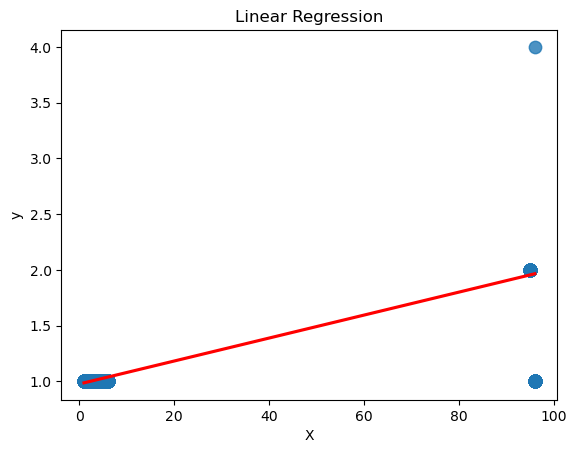

In [130]:
sns.regplot(x=X.flatten(), y=y, scatter_kws={'s': 80}, line_kws={'color': 'red'})
plt.xlabel('X')
plt.ylabel('y')
plt.title('Linear Regression')
plt.show()